In [5]:
from cort.core import corpora
from code.coref_utils import conll

from cort.analysis import error_extractors
from cort.analysis import spanning_tree_algorithms

In [2]:
reference_file = "/home/shtoshni/Research/litbank_coref/data/ontonotes/conll/dev.conll"
output_file = "/home/shtoshni/Research/litbank_coref/models/ontonotes_logs/ontonotes_learned_10.conll"

In [3]:
reference = corpora.Corpus.from_file("reference", open(reference_file))
system = corpora.Corpus.from_file("learned", open(output_file))

/home/shtoshni/Development/anaconda3/envs/coref/lib/python3.6/site-packages/jpype/_core.py:209: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)
/home/shtoshni/Development/anaconda3/envs/coref/lib/python3.6/site-packages/StanfordDependencies/JPypeBackend.py:160: UserWarning: This jar doesn't support universal dependencies, falling back to Stanford Dependencies. To suppress this message, call with universal=False
  warnings.warn("This jar doesn't support universal "


In [14]:
output_file = "/home/shtoshni/Research/litbank_coref/models/ontonotes_logs/ontonotes_lru_10.conll"
system_2 = corpora.Corpus.from_file("lru", open(output_file))

In [18]:
extractor.add_system(system_2)

In [8]:
extractor = error_extractors.ErrorExtractor(
    reference,
    spanning_tree_algorithms.recall_accessibility,
    spanning_tree_algorithms.precision_system_output
)

In [9]:
extractor.add_system(system)

In [22]:
errors = extractor.get_errors()


In [13]:
errors["learned"]["recall_errors"]["all"]

[((tc/ch/00/ch_0020); part 001, (3, 3): ['she'], (tc/ch/00/ch_0020); part 001, (2, 2): ['Cocoa']), ((tc/ch/00/ch_0040); part 001, (4, 4): ['both'], (tc/ch/00/ch_0040); part 001, (3, 4): ['they', 'both']), ((nw/wsj/24/wsj_2446); part 000, (4, 11): ['the', 'Senate', 'Ethics', 'Committee', 'and', 'the', 'Justice', 'Department'], (nw/wsj/24/wsj_2446); part 000, (3, 11): ['both', 'the', 'Senate', 'Ethics', 'Committee', 'and', 'the', 'Justice', 'Department']), ((bc/msnbc/00/msnbc_0000); part 013, (5, 5): ['their'], (bc/msnbc/00/msnbc_0000); part 013, (2, 3): ['two', 'mothers']), ((nw/wsj/24/wsj_2425); part 000, (5, 8): ['Assurances', 'Generales', 'de', 'France'], (nw/wsj/24/wsj_2425); part 000, (0, 8): ['The', 'state', '-', 'controlled', 'insurer', 'Assurances', 'Generales', 'de', 'France']), ((tc/ch/00/ch_0020); part 001, (7, 7): ['married'], (tc/ch/00/ch_0020); part 001, (4, 4): ['got']), ((nw/wsj/24/wsj_2408); part 000, (7, 8): ['39', 'years'], (nw/wsj/24/wsj_2408); part 000, (4, 23): ['G

In [12]:
print (len(errors["learned"]["recall_errors"]["all"])

2703


In [24]:
print (len(errors["lru"]["recall_errors"]["all"]))
print()

2921



AttributeError: 'Legend' object has no attribute 'draggable'

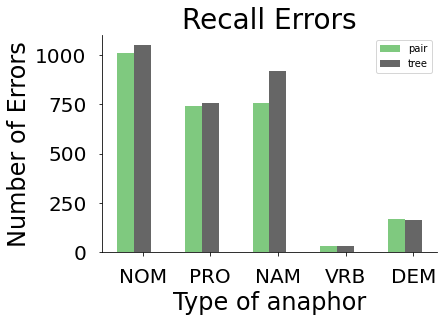

In [27]:
from cort.analysis import plotting

errors_by_type = errors.categorize(
    lambda error: error[0].attributes['type']
)

pair_errs = errors_by_type["learned"]["recall_errors"]["all"]
tree_errs = errors_by_type["lru"]["recall_errors"]["all"]
plotting.plot(
    [("pair", [(cat, len(errs)) for cat, errs in pair_errs.items()]),
     ("tree", [(cat, len(errs)) for cat, errs in tree_errs.items()])],
    "Recall Errors",
    "Type of anaphor",
    "Number of Errors")